# **Data Visualization - Python - Matplotlib**

2D HeatMap

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ORLBD7ObSCUIDVV8fWbfMa2zhQcl4v8w?usp=sharing)

*Oleh : Sinubi*

## Persiapan

In [ ]:
# Import Packages/Libraries yang diperlukan
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import pandas as pd
import gdown

In [ ]:
# Menampilkan Versi Packages yang digunakan
print("Versi Matplotlib : ", matplotlib.__version__)
print("Versi Numpy      : ", np.__version__)
print("Versi Pandas     : ", pd.__version__)
print("Versi Gdown      : ", gdown.__version__)

Versi Matplotlib :  3.7.1
Versi Numpy      :  1.23.5
Versi Pandas     :  1.5.3
Versi Gdown      :  4.6.6


In [ ]:
# Download Dataset Sinubi
gdown.download_folder("https://drive.google.com/drive/folders/1d0O3AuXl4z8VSj75v6WWuaxtUWXnmSYB?usp=sharing")

Retrieving folder list


Processing file 1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G Dataset SJ 01.xlsx
Processing file 1gme7jjukWjJrfeKG01aBBx8CTS3cHxOu Dataset SJ 02.xlsx
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1Z1oDLjOAedliOGfI_zRiV9UgqXUC605G
To: /content/Sinubi's Journey/Dataset SJ 01.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 16.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gme7jjukWjJrfeKG01aBBx8CTS3cHxOu
To: /content/Sinubi's Journey/Dataset SJ 02.xlsx
100%|██████████| 12.2k/12.2k [00:00<00:00, 31.4MB/s]
Download completed


["/content/Sinubi's Journey/Dataset SJ 01.xlsx",
 "/content/Sinubi's Journey/Dataset SJ 02.xlsx"]

In [ ]:
# Import Dataset Sinubi
nama_file = "./Sinubi's Journey/Dataset SJ 01.xlsx"

data_df = pd.read_excel(nama_file, sheet_name='data')

In [ ]:
# Menampilkan Beberapa Data Awal pada Dataset Sinubi
data_df.head()

,Nomor Induk,Nama,Jenis Kelamin,Mata Pelajaran,Akses Internet,Waktu Belajar,Nilai,Lulus
0,DS23001,Sinubi,Pria,Pemrograman Python,Ada,8.0,85,Lulus
1,DS23002,Budi,Pria,Pemrograman Python,Ada,7.5,80,Lulus
2,DS23003,Ayu,Wanita,Pemrograman Python,Ada,8.5,90,Lulus
3,DS23004,Tono,Pria,Machine Learning,Ada,8.2,88,Lulus
4,DS23005,Putri,Wanita,Machine Learning,Ada,7.7,83,Lulus


In [ ]:
# Membuat Subset (Filter) Dataset untuk "Mata Pelajaran" = "Pemrograman Python" saja
data_df = data_df[data_df["Mata Pelajaran"] == "Pemrograman Python"]

In [ ]:
# Menampilkan Statistik (Frekuensi) dari Variabel "Jenis Kelamin" pada Dataset Sinubi
data_df['Jenis Kelamin'].value_counts()

Pria      17
Wanita    13
Name: Jenis Kelamin, dtype: int64

In [ ]:
# Menampilkan Statistik (Frekuensi) dari Variabel "Lulus" pada Dataset Sinubi
data_df['Lulus'].value_counts()

Lulus          17
Tidak Lulus    13
Name: Lulus, dtype: int64

In [ ]:
# Contingency Table untuk Variabel "Jenis Kelamin" dan "Lulus"
pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin'])

Jenis Kelamin,Pria,Wanita
Lulus,,
Lulus,10,7
Tidak Lulus,7,6


In [ ]:
# Array dari Contingency Table untuk Variabel "Jenis Kelamin" dan "Lulus"
np.array(pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']))

array([[10,  7],
       [ 7,  6]])

In [ ]:
# Label Baris
pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).index.to_list()

['Lulus', 'Tidak Lulus']

In [ ]:
# Label Kolom
pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).columns.to_list()

['Pria', 'Wanita']

## *2D HeatMap* dari Array

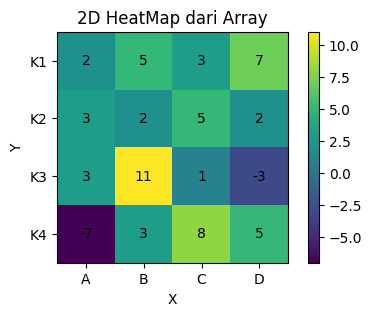

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array([[2,  5, 3,  7],
                          [3,  2, 5,  2],
                          [3, 11, 1, -3],
                          [-7, 3, 8,  5]])

label_X = ["A", "B", "C", "D"]
label_Y = ["K1", "K2", "K3", "K4"]

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d)

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="black")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari Array')                      # Judul Gambar
plt.xlabel('X')                                         # Keterangan untuk Sumbu X
plt.ylabel('Y')                                         # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

### Mengubah Warna *2D HeatMap* dengan "cmap"

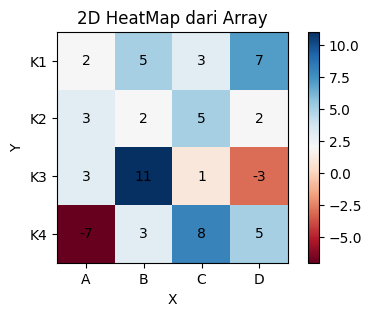

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array([[2,  5, 3,  7],
                          [3,  2, 5,  2],
                          [3, 11, 1, -3],
                          [-7, 3, 8,  5]])

label_X = ["A", "B", "C", "D"]
label_Y = ["K1", "K2", "K3", "K4"]

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d,
                     cmap = "RdBu")                     # Mengubah Warna HeatMap dengan "cmap"
                                                        # Pilihan "cmaps" :
                                                        # "Y1Gn", "Blues", "cool", "coolwarm"
                                                        # "hot", "RdBu"

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="black")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari Array')                      # Judul Gambar
plt.xlabel('X')                                         # Keterangan untuk Sumbu X
plt.ylabel('Y')                                         # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

### Mengubah Warna *2D HeatMap* dengan custom "cmap" menggunakan "Color List"

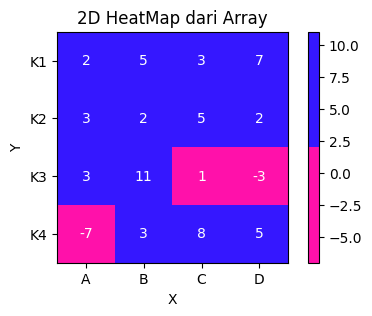

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array([[2,  5, 3,  7],
                          [3,  2, 5,  2],
                          [3, 11, 1, -3],
                          [-7, 3, 8,  5]])

label_X = ["A", "B", "C", "D"]
label_Y = ["K1", "K2", "K3", "K4"]

# Custom cmap
colors_list = ['#FF11aa', '#3517FF']
cmap_custom = colors.ListedColormap(colors_list)

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d,
                     cmap = cmap_custom)                # Mengubah Warna HeatMap dengan custom "cmap"

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="white")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari Array')                      # Judul Gambar
plt.xlabel('X')                                         # Keterangan untuk Sumbu X
plt.ylabel('Y')                                         # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

## *2D HeatMap* dari DataFrame

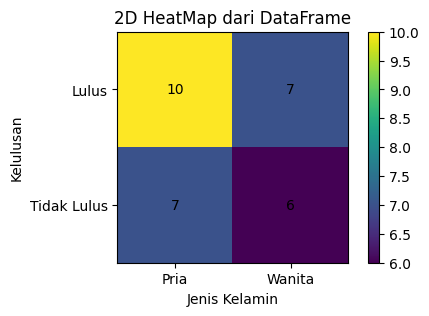

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array(pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']))

label_X = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).columns.to_list()
label_Y = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).index.to_list()

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d)

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="black")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari DataFrame')                  # Judul Gambar
plt.xlabel('Jenis Kelamin')                             # Keterangan untuk Sumbu X
plt.ylabel('Kelulusan')                                 # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

### Mengubah Warna *2D HeatMap* dengan "cmap"

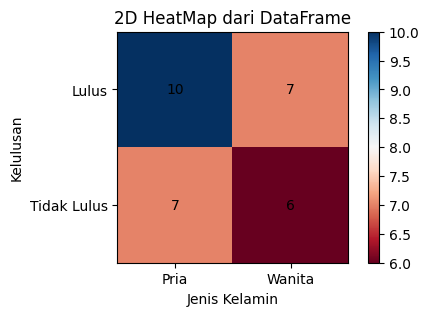

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array(pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']))

label_X = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).columns.to_list()
label_Y = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).index.to_list()

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d,
                     cmap = "RdBu")                     # Mengubah Warna HeatMap dengan "cmap"
                                                        # Pilihan "cmaps" :
                                                        # "Y1Gn", "Blues", "cool", "coolwarm"
                                                        # "hot", "RdBu"

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="black")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari DataFrame')                  # Judul Gambar
plt.xlabel('Jenis Kelamin')                             # Keterangan untuk Sumbu X
plt.ylabel('Kelulusan')                                 # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

### Mengubah Warna *2D HeatMap* dengan custom "cmap" menggunakan "Color List"

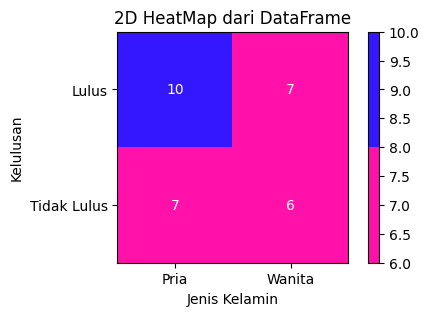

In [ ]:
# Menyiapkan Data Array dan Label
data_array_2d = np.array(pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']))

label_X = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).columns.to_list()
label_Y = pd.crosstab(data_df['Lulus'], data_df['Jenis Kelamin']).index.to_list()

# Custom cmap
colors_list = ['#FF11aa', '#3517FF']
cmap_custom = colors.ListedColormap(colors_list)

# Membuat 2D HeatMap
fig = plt.figure(figsize = (5,3))                       # Ukuran Gambar (dalam inci)
ax = fig.add_subplot()

heatmap = plt.imshow(data_array_2d,
                     cmap = cmap_custom)                # Mengubah Warna HeatMap dengan "cmap"

for i in range(len(label_Y)):                           # Menampilkan Data Array (Looping)
    for j in range(len(label_X)):
        text = ax.text(j, i,
                       data_array_2d[i, j],
                       ha="center",
                       va="center",
                       color="white")                   # Warna Text Nilai Array

ax.set_xticks(np.arange(len(label_X)),                  # Label untuk Sumbu X
              labels = label_X)
ax.set_yticks(np.arange(len(label_Y)),                  # Label untuk Sumbu Y
              labels = label_Y)

plt.title('2D HeatMap dari DataFrame')                  # Judul Gambar
plt.xlabel('Jenis Kelamin')                             # Keterangan untuk Sumbu X
plt.ylabel('Kelulusan')                                 # Keterangan untuk Sumbu Y
plt.colorbar(heatmap)                                   # Menampilkan ColorBar
plt.show()

# Referensi Eksternal

*   https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
*   https://www.geeksforgeeks.org/how-to-draw-2d-heatmap-using-matplotlib-in-python/
*   https://python-charts.com/correlation/heatmap-matplotlib/
*   https://medium.com/@codingInformer/how-to-create-heatmaps-using-matplotlib-pyplot-db9ff94d25e8
*   https://datavizpyr.com/heatmap-with-matplotlib-in-python/
*   https://www.pythonpool.com/matplotlib-heatmap/
*   https://www.boardinfinity.com/blog/drawing-a-2-d-heatmap-in-python-using-matplotlib/
*   https://coderslegacy.com/python/plotting-2d-heatmap-matplotlib/
*   https://machinelearningknowledge.ai/matplotlib-heatmap-complete-tutorial-for-beginners/
*   https://linuxhint.com/matplotlib-heatmap/
*   https://pythonspot.com/generate-heatmap-in-matplotlib/
*   https://www.tutorialspoint.com/how-to-annotate-a-heatmap-with-text-in-matplotlib
*   https://www.tutorialspoint.com/creating-a-heatmap-in-matplotlib-with-pcolor

